Note: The code can be easily modified for more than two assets

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

In this section, I want to obtain two securities that have little correlation with each other.
I think that gold and S&P500 should have little positive or even negative correlation

In [2]:
tickers = ['GLD','^GSPC']
yfin.pdr_override() #  you ensure compatibility with the Yahoo Finance API changes and possibly improve the reliability and functionality of data retrieval from Yahoo Finance within your code
data = pd.DataFrame()
for t in tickers:
    data[t] = pdr.get_data_yahoo(t, start="2012-03-30", end="2024-03-30")['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,GLD,^GSPC
Date,,
2012-03-30,162.119995,1408.469971
2012-04-02,162.940002,1419.040039
2012-04-03,159.889999,1413.380005
2012-04-04,157.210007,1398.959961
2012-04-05,158.309998,1398.079956


In [4]:
data.tail()

,GLD,^GSPC
Date,,
2024-03-22,200.350006,5234.180176
2024-03-25,200.990005,5218.189941
2024-03-26,201.639999,5203.580078
2024-03-27,203.100006,5248.490234
2024-03-28,205.720001,5254.350098


Daily retrun

In [5]:
simple_return_d = data/data.shift(1)-1
simple_return_d

,GLD,^GSPC
Date,,
2012-03-30,NaN,NaN
2012-04-02,0.005058,0.007505
2012-04-03,-0.018719,-0.003989
2012-04-04,-0.016761,-0.010203
2012-04-05,0.006997,-0.000629
...,...,...
2024-03-22,-0.008021,-0.001402
2024-03-25,0.003194,-0.003055
2024-03-26,0.003234,-0.002800


In [6]:
simple_return_d[np.isnan(simple_return_d)] = 0
simple_return_d

,GLD,^GSPC
Date,,
2012-03-30,0.000000,0.000000
2012-04-02,0.005058,0.007505
2012-04-03,-0.018719,-0.003989
2012-04-04,-0.016761,-0.010203
2012-04-05,0.006997,-0.000629
...,...,...
2024-03-22,-0.008021,-0.001402
2024-03-25,0.003194,-0.003055
2024-03-26,0.003234,-0.002800


In [7]:
avg_return = (simple_return_d).mean()
print('average daily return:\n',avg_return)
print('avg daily return for the market: ', avg_return.iloc[1])

average daily return:
 GLD      0.000122
^GSPC    0.000493
dtype: float64
avg daily return for the market:  0.0004933871755456479


In [8]:
std_d = (simple_return_d).std()
print('std deviation of daily return:\n',std_d)

std deviation of daily return:
 GLD      0.009317
^GSPC    0.010662
dtype: float64


In [9]:
covar = (simple_return_d).cov()
print('covariance of daily return:\n',covar)

covariance of daily return:
             GLD     ^GSPC
GLD    0.000087  0.000004
^GSPC  0.000004  0.000114


In [10]:
var = (simple_return_d).var()
print('variance of daily return:\n',var)

variance of daily return:
 GLD      0.000087
^GSPC    0.000114
dtype: float64


In [11]:
correlation = (simple_return_d).corr()
print('correlation matrix for two securities:\n',correlation)
cor=correlation.loc[tickers[0]][tickers[1]]
print('correlation between two securities: ', cor)

correlation matrix for two securities:
            GLD    ^GSPC
GLD    1.00000  0.04001
^GSPC  0.04001  1.00000
correlation between two securities:  0.04000951035447616


In [12]:
Beta_daily = covar.iloc[0,1]/var.iloc[1]
print(Beta_daily)

0.03496212607219086


assign random weight

In [13]:
RW = np.random.random(len(tickers)) # two random number that should be normalized
w = RW/sum(RW)
w # weight of each security

array([0.61862342, 0.38137658])

Expected portfolio retrun

In [14]:
np.sum(w * avg_return*250)

0.06597371074718494

Expected portfolio volatility

In [15]:
np.sqrt(np.dot(w.T,np.dot(covar,w))*250)

0.11361119625397563

portfolio retrun and volatility simulation

In [16]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    RW = np.random.random(len(tickers)) # two random number that should be normalized
    w = RW/sum(RW)
    pfolio_returns.append(np.sum(w * avg_return*250))
    pfolio_volatilities.append(np.sqrt(np.dot(w.T,np.dot(covar,w))*250))

pfolio_returns, pfolio_volatilities

([0.08846666522875847,
  0.05158336375895886,
  0.06501370003714771,
  0.08050840279127656,
  0.04822802971492525,
  0.10552129180443232,
  0.06627855826205953,
  0.07090210186645499,
  0.05884827767351587,
  0.054595274568173355,
  0.05812200221126025,
  0.0827121632217863,
  0.06184928352678579,
  0.05814516163322353,
  0.03898010895045934,
  0.04291701999521796,
  0.05310320381683423,
  0.09984504101840014,
  0.05934817371660697,
  0.03437462317572155,
  0.09660968430841718,
  0.0997974106125016,
  0.04585056376675878,
  0.112211661636451,
  0.09482997303544995,
  0.046327010523164375,
  0.0876417476068965,
  0.07434140054225259,
  0.03903236236594022,
  0.10557402019221278,
  0.09836482480990615,
  0.0417866695222109,
  0.0697194426734316,
  0.04679084930703793,
  0.10465506436363356,
  0.11453589896689836,
  0.06246347052359357,
  0.11466991225295334,
  0.03609767966249231,
  0.04993888612346591,
  0.09174173758414463,
  0.08127254760419034,
  0.05830106104169609,
  0.105307634311

In [17]:
#pfolio_returns = np.array(pfolio_returns)
#pfolio_volatilities = np.array(pfolio_volatilities)

Text(0, 0.5, 'Expected Return')

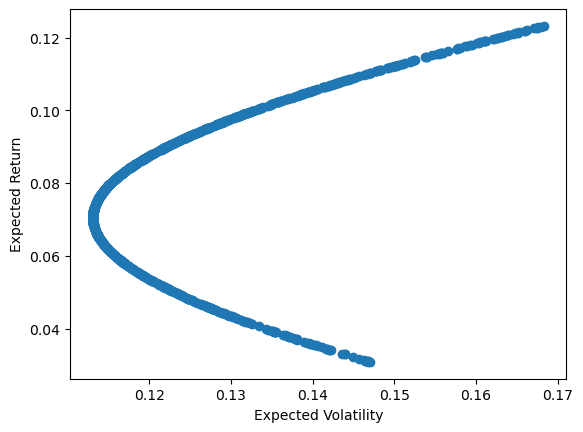

In [18]:
plt.plot(pfolio_volatilities, pfolio_returns,'o')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')